In [2]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
prop_data = pd.read_csv('../data/all_sold_property_data.csv')

C:\Users\2003a\AppData\Local\Temp\ipykernel_15956\1899678723.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_data = pd.read_csv('../data/all_sold_property_data.csv')


In [4]:
prop_data.columns

Index(['index', 'address', 'city', 'state', 'zipcode', 'county', 'countyFIPS',
       'latitude', 'longitude', 'bathrooms', 'bathroomsFull', 'bathroomsHalf',
       'bedrooms', 'homeStatus', 'homeType', 'livingArea', 'lotSize', 'price',
       'currency', 'description', 'contingentListingType', 'datePostedString',
       'datePriceChanged', 'dateSoldString', 'daysOnZillow', 'favoriteCount',
       'isListedByOwner', 'isNonOwnerOccupied', 'isPreforeclosureAuction',
       'isBankOwned', 'isForeclosure', 'isFSBA', 'isFSBO', 'isComingSoon',
       'isForAuction', 'isNewHome', 'isOpenHouse', 'isPending',
       'isZillowOwned', 'keystoneHomeStatus', 'lastSoldPrice',
       'listingTypeDimension', 'listing_agent', 'livingAreaUnits',
       'livingAreaUnitsShort', 'livingAreaValue', 'lotAreaUnits',
       'lotAreaValue', 'taxAssessedValue', 'taxAssessedYear', 'taxHistory',
       'appliances', 'architecturalStyle', 'heating', 'cooling', 'fencing',
       'flooring', 'basement', 'yearBuilt', 

####Data Cleaning:
retain only the most important attributes 

In [5]:
stripped_data = prop_data[['bathrooms', 'bedrooms', 'homeType', 'livingArea', 'lotSize', 'taxAssessedValue', 'yearBuilt', 'price']]
#stripped_data.set_index('address')
stripped_data = stripped_data.dropna()
stripped_data.size

56560

In [6]:
stripped_data.head()

,bathrooms,bedrooms,homeType,livingArea,lotSize,taxAssessedValue,yearBuilt,price
1,2.0,3.0,SINGLE_FAMILY,1425.0,15245.0,263000.0,1990.0,385000.0
2,4.0,4.0,SINGLE_FAMILY,3361.0,21344.0,488000.0,1987.0,550000.0
3,3.0,3.0,SINGLE_FAMILY,1662.0,14810.0,339700.0,1987.0,365000.0
4,3.0,4.0,SINGLE_FAMILY,2251.0,15681.0,412900.0,1987.0,415000.0
5,3.0,4.0,SINGLE_FAMILY,2316.0,11325.0,426400.0,2010.0,449900.0


In [23]:
stripped_data['homeType'].unique()

array(['SINGLE_FAMILY', 'CONDO', 'TOWNHOUSE', 'MULTI_FAMILY',
       'HOME_TYPE_UNKNOWN', 'MANUFACTURED', 'APARTMENT', 'LOT'],
      dtype=object)

In [16]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### We must one-hot encode 'homeType' because it is a string

In [7]:
df_encoded = pd.get_dummies(stripped_data, columns=['homeType'], drop_first=True)

In [8]:
df_encoded.head()

,bathrooms,bedrooms,livingArea,lotSize,taxAssessedValue,yearBuilt,price,homeType_CONDO,homeType_HOME_TYPE_UNKNOWN,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
1,2.0,3.0,1425.0,15245.0,263000.0,1990.0,385000.0,False,False,False,False,False,True,False
2,4.0,4.0,3361.0,21344.0,488000.0,1987.0,550000.0,False,False,False,False,False,True,False
3,3.0,3.0,1662.0,14810.0,339700.0,1987.0,365000.0,False,False,False,False,False,True,False
4,3.0,4.0,2251.0,15681.0,412900.0,1987.0,415000.0,False,False,False,False,False,True,False
5,3.0,4.0,2316.0,11325.0,426400.0,2010.0,449900.0,False,False,False,False,False,True,False


####Split dataset into training and testing sets 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#prop_val = df_encoded[df_encoded.columns[:-1]]
#prop_price = df_encoded['price']
#X_train, X_test, y_train, y_test = train_test_split(prop_val, prop_price, 
#                                                                test_size=0.3, random_state=1)
X = df_encoded[['bathrooms', 'bedrooms', 'livingArea', 'lotSize', 'taxAssessedValue', 'yearBuilt'] + 
               [col for col in df_encoded.columns if 'homeType_' in col]]
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape, X_test.shape)

(5656, 13) (1414, 13)


### Standardize values

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# predict and evlaluate model
y_pred = lm.predict(X_test_scaled)

## Accuracy of model results 

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

print(f"MAPE: {mape:.2f}%") 
print(f"SMAPE: {smape:.2f}%") 
print(f"R² Score: {r2:.2f}") 

MSE: 9867273810.06
RMSE: 99334.15
MAPE: 29.32%
SMAPE: 19.02%
R² Score: 0.82


In [25]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Scatter plot

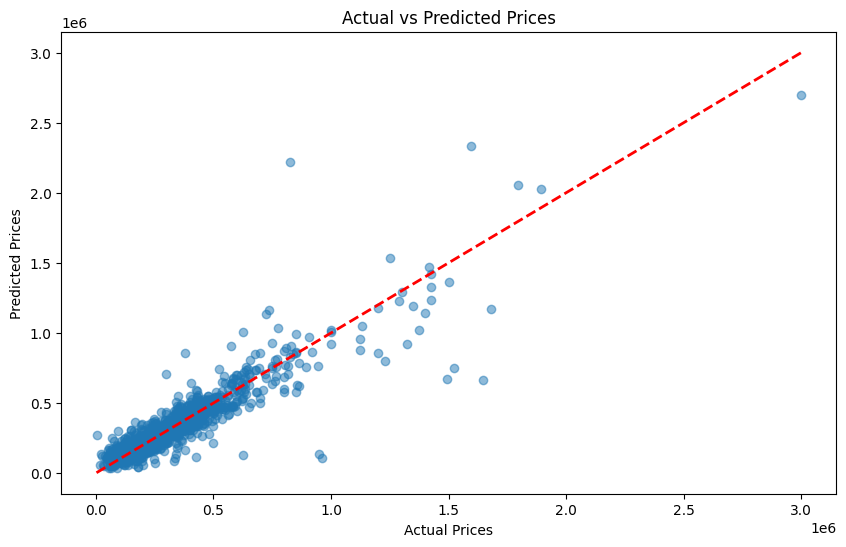

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


### Coefficients visualization 

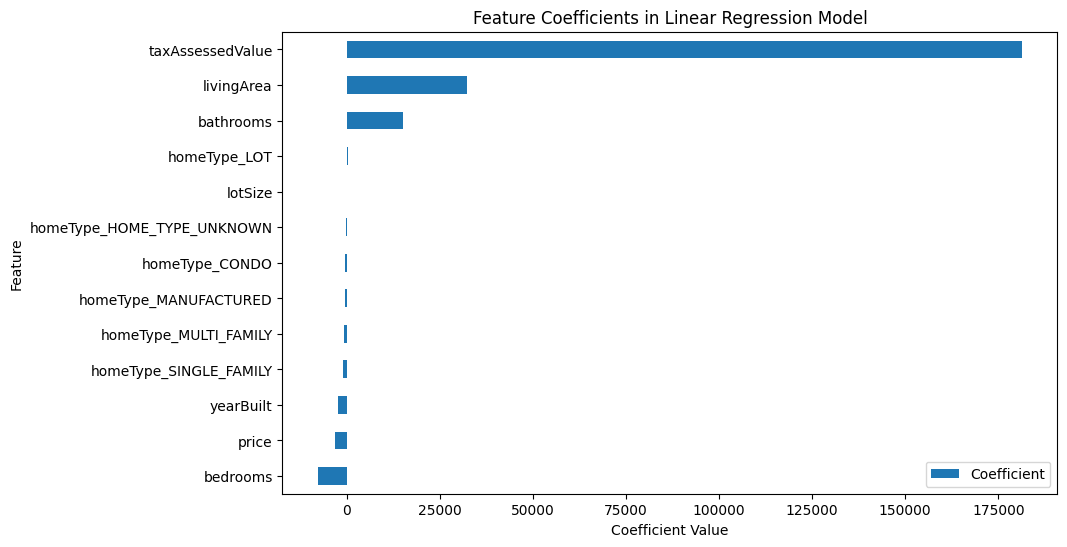

In [61]:
# Get feature coefficients and create a bar plot
coefficients = pd.DataFrame(lm.coef_, prop_val.columns, columns=['Coefficient']).sort_values(by='Coefficient')
coefficients.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Coefficients in Linear Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
